Unsupervised Learning using K Means Clustering:
KMeans is specifically designed for clustering tasks. It divides the data points into "k" distinct clusters based on their similarities

In this example we will be using Iris dataset,and perform PCA for dimensionality reduction and visualization, and then apply the KMeans clustering algorithm to group the data into clusters.
The Iris dataset is a famous dataset in machine learning. It contains measurements of sepals and petals of iris flowers, along with their species labels.

The aim is to identify natural groupings in the data without relying on any known target labels.

1) Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


2) Loading the Iris dataset

In [2]:
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names


data contains the features , target contains the corresponding species labels, and target_names contains the names of the three iris species

3) Performing: PCA for dimensionality reduction and visualization:
PCA (Principal Component Analysis) is used here to reduce the dimensionality of the data from four features to two principal components. This will allow us to visualize the data in a 2D space.

In [3]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)


4) Finding the optimal number of clusters using the Elbow method:
The Elbow method is a technique to determine the optimal number of clusters for KMeans clustering.

In [4]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

We calculate within-cluster sum of squares, commonly known as "inertia," for different values of k (number of clusters) when applying the KMeans clustering algorithm. The purpose of this process is to use the Elbow method to identify the optimal number of clusters for the dataset.

5) Plotting Elbow method graph:
This step plots the Elbow method graph showing the inertia values for different k values. The plot will help us identify the optimal number of clusters based on the "elbow" point in the graph.

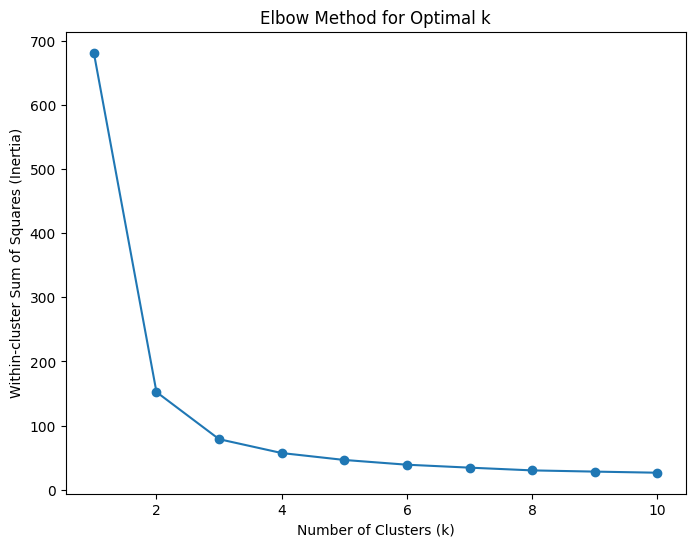

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


6) Choosing the optimal number of clusters:
The optimal number of clusters is chosen as 3 (based on the Elbow method). The KMeans algorithm is then applied to the data with n_clusters=3, and the model is fitted.

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

7) Getting the cluster centers and labels:
After fitting the KMeans model, we obtain the cluster centers and the cluster labels assigned to each data point.

In [7]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


cluster centers are obtained from the KMeans model using the kmeans.cluster_centers_ attribute

8) Plotting the clustered data points along with cluster centers:
This step plots the data points in the reduced 2D space, where the color represents the assigned cluster label. It also shows the cluster centers as red "x" markers.

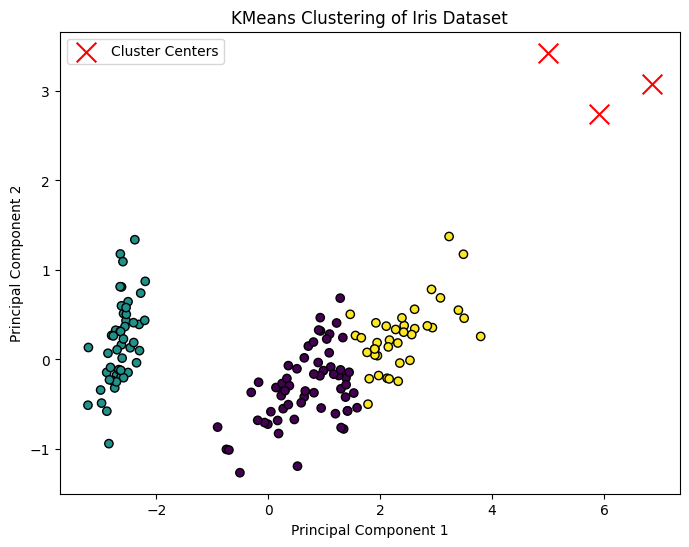

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()


9) Visualizing the clustered data with target labels (for comparison):
This step plots the data points in the reduced 2D space, where the color represents the true species labels. This visualization allows us to compare the clustering results with the original species labels.


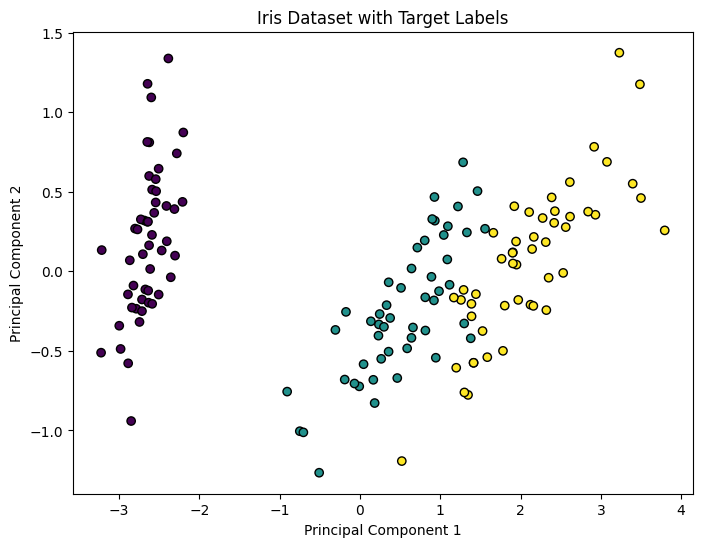

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=target, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset with Target Labels')
plt.show()
